### 한글폰트

In [1]:
!sudo apt-get update -qq # 폰트 설정을 위한 코드
!sudo apt-get install fonts-nanum* -qq
!sudo fc-cache -fv

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
[sudo] password for cjm: 
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
[sudo] password for cjm: 
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
[sudo] password for cjm: 


In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

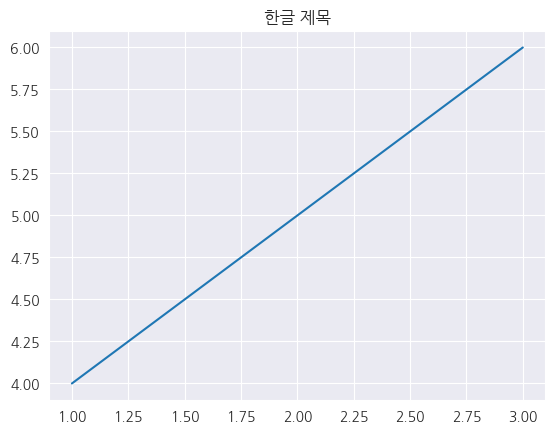

In [28]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 제목') # 한글 제목이 정상적으로 표시되는지 확인
plt.show()

## 데이터 다운로드

In [8]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [9]:
# Make a directory named kaggle and copy the kaggle. json file there
!mkdir C:\Users\jung0\OneDrive\Desktop\aiffel\dlton\DLThon_14th\.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
cp: cannot stat 'kaggle.json': No such file or directory
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
chmod: cannot access '/home/cjm/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle competitions download -c aiffel-dl-thon-dktc-online-14

aiffel-dl-thon-dktc-online-14.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile
file_name = "/content/aiffel-dl-thon-dktc-online-14.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## 데이터 처리

In [19]:
!pwd

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/mnt/c/Users/jung0/OneDrive/Desktop/aiffel/dlton/DLThon_14th


In [1]:
import pandas as pd

# 데이터 읽기
train_data = pd.read_csv('data/training.csv', index_col='idx')
test_data = pd.read_csv('data/test.csv', index_col='idx')

In [2]:
train_data.head()

,class,conversation
idx,,
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [3]:
test_data.head()

,text
idx,
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


In [4]:
# 데이터 프레임 정보 확인 (열, 결측치 등)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4929 entries, 0 to 4928
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         4929 non-null   object
 1   conversation  4929 non-null   object
dtypes: object(2)
memory usage: 115.5+ KB
None


In [5]:
class_counts = train_data.groupby('class').size()
print(class_counts)

class
갈취 대화           981
기타 괴롭힘 대화      1094
일반 대화           979
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64


In [7]:
# 'class' 열의 고유값별 개수 세기
class_counts = train_data['class'].value_counts()

# 결과 출력
print("클래스별 데이터 개수:\n", class_counts)

# 비율 계산 및 출력
class_proportions = train_data['class'].value_counts(normalize=True) * 100
print("\n클래스별 데이터 비율 (%):\n", class_proportions)

클래스별 데이터 개수:
 class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
일반 대화           979
협박 대화           896
Name: count, dtype: int64

클래스별 데이터 비율 (%):
 class
기타 괴롭힘 대화      22.195171
갈취 대화          19.902617
직장 내 괴롭힘 대화    19.862041
일반 대화          19.862041
협박 대화          18.178129
Name: proportion, dtype: float64


In [8]:
x_train = train_data['conversation']
y_train = train_data['class']

## 데이터 길이, 클래스 분포 확인

데이터 정보
--------------------------------------------------
x_train : (4929,)
y_train : (4929,)
label 종류: {'갈취 대화', '기타 괴롭힘 대화', '협박 대화', '직장 내 괴롭힘 대화', '일반 대화'}
--------------------------------------------------
클래스의 수 : 5
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :216.85088253195374


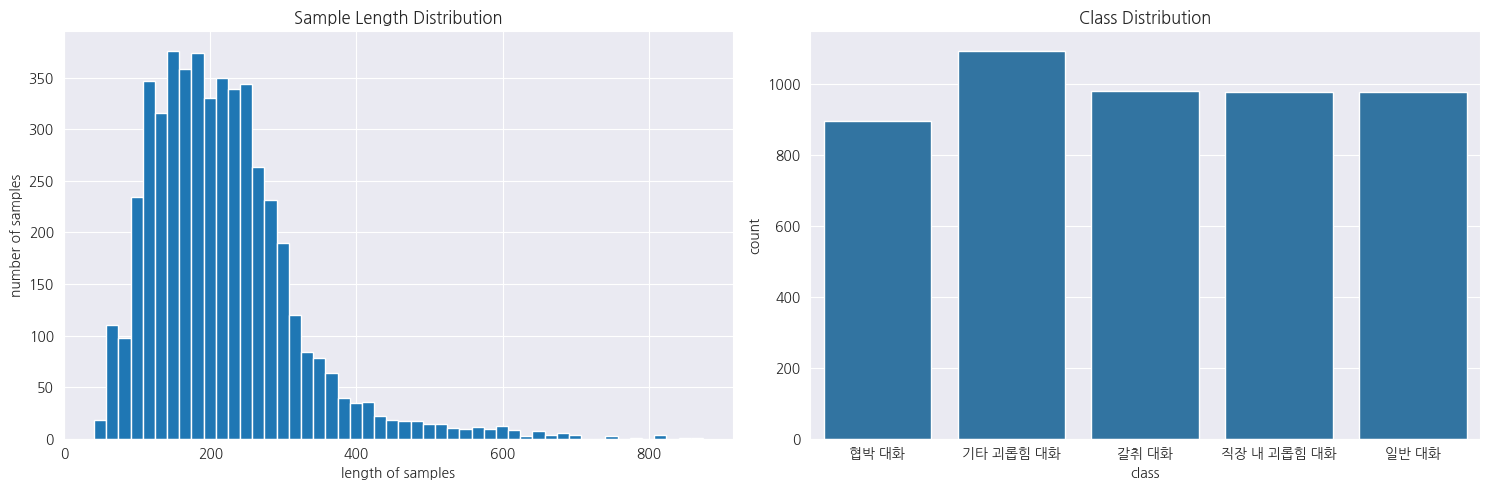

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
import numpy as np
import pandas as pd
import seaborn as sns

print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 5
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

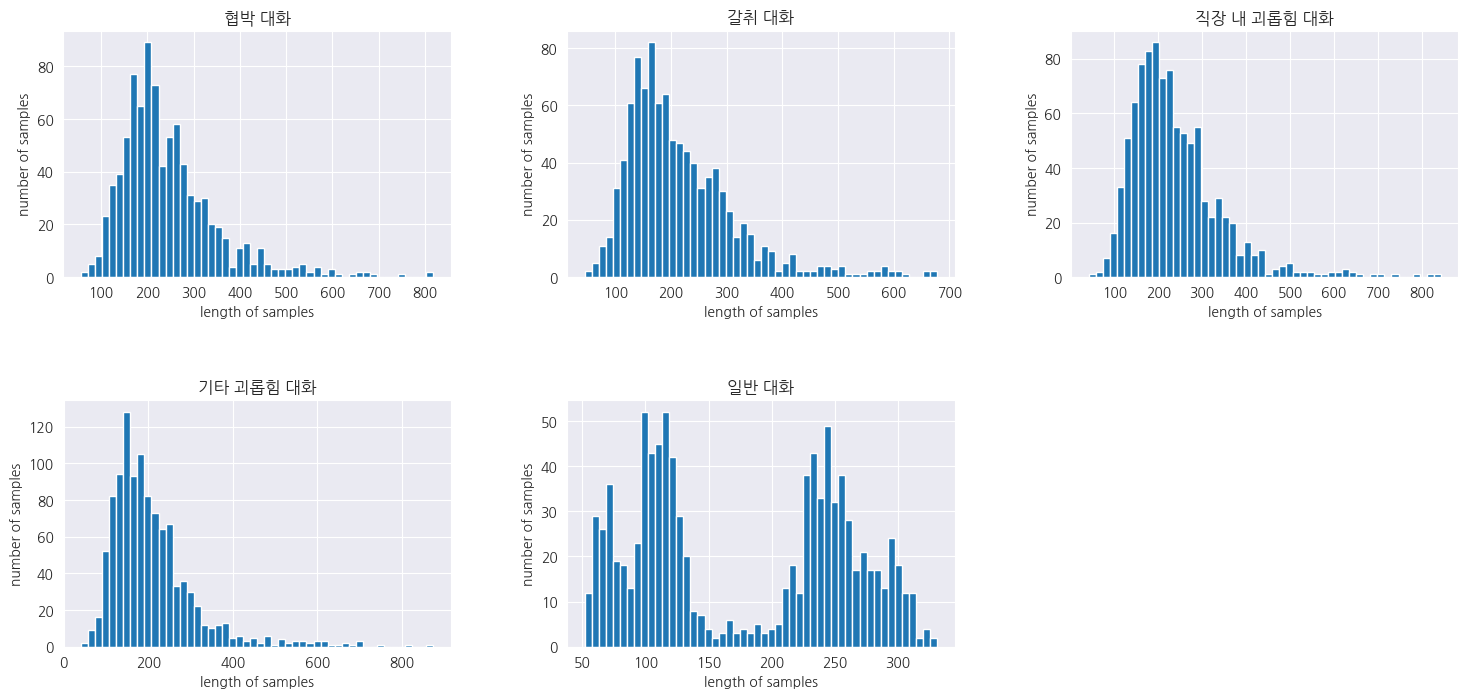

In [10]:
import matplotlib.pyplot as plt

# 5개 클래스 이름 (원하는 순서대로 나열)
classes = [
    "협박 대화",
    "갈취 대화",
    "직장 내 괴롭힘 대화",
    "기타 괴롭힘 대화",
    "일반 대화"
]

# 2행 3열 subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

# axes를 1차원 리스트로 변환
axes = axes.flatten()

# 각 클래스별 히스토그램 그리기
for i, cls in enumerate(classes):
    axes[i].hist([len(s) for s in train_data['conversation'][train_data['class'] == cls]], bins=50)
    axes[i].set_xlabel('length of samples')
    axes[i].set_ylabel('number of samples')
    axes[i].set_title(cls)

# 남는 subplot 숨기기 (2×3=6개 중 1개는 비어있음)
for j in range(len(classes), len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


In [38]:
from collections import Counter
import re

# 불용어(stop_words) 목록 정의 (조사, 접속사 등)
# 일단은 작은 불용어 사전을 이용하여 빈도수 측정
stop_words = ['은', '는', '이', '가', '다', '을', '를', '에', '와', '과', '에서']

# 텍스트 전처리 및 키워드 추출 함수
def get_keywords(text):
    text = re.sub(r'[^가-힣\s]', '', text) # 한글과 공백만 남기기
    words = text.split()
    return [word for word in words if word not in stop_words and len(word) > 1] # 불용어 및 한 글자 단어 제거

# 각 클래스별 키워드 빈도 분석
for cls in train_data['class'].unique():
    class_df = train_data[train_data['class'] == cls]
    all_text = ' '.join(class_df['conversation'])
    keywords = get_keywords(all_text)

    # 상위 10개 키워드 출력
    print(f"\n--- {cls}의 주요 키워드 ---")
    print(Counter(keywords).most_common(10))


--- 협박 대화의 주요 키워드 ---
[('내가', 923), ('제발', 397), ('지금', 337), ('진짜', 311), ('그냥', 241), ('니가', 241), ('그래', 228), ('죄송합니다', 222), ('아니', 219), ('그럼', 208)]

--- 기타 괴롭힘 대화의 주요 키워드 ---
[('내가', 647), ('진짜', 440), ('아니', 375), ('그냥', 314), ('그래', 245), ('지금', 233), ('아니야', 225), ('그렇게', 223), ('무슨', 222), ('니가', 218)]

--- 갈취 대화의 주요 키워드 ---
[('내가', 704), ('진짜', 400), ('그럼', 366), ('이거', 362), ('아니', 343), ('지금', 316), ('그래', 273), ('돈이', 255), ('없어', 241), ('그냥', 237)]

--- 직장 내 괴롭힘 대화의 주요 키워드 ---
[('죄송합니다', 840), ('내가', 535), ('아니', 389), ('제가', 386), ('지금', 324), ('그럼', 275), ('오늘', 243), ('부장님', 239), ('무슨', 217), ('그렇게', 199)]

--- 일반 대화의 주요 키워드 ---
[('좋아해', 444), ('정말', 313), ('있어', 183), ('영화', 168), ('주말에', 159), ('많이', 158), ('같이', 157), ('어때', 152), ('주로', 152), ('어떤', 146)]


In [43]:
# kc_electra_accel_safe.py
import os, numpy as np
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import torch
from torch import nn
from torch.utils.data import DataLoader

from accelerate import Accelerator
from accelerate.state import AcceleratorState
from accelerate.utils import ProjectConfiguration

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    DataCollatorWithPadding, get_linear_schedule_with_warmup,
    BitsAndBytesConfig
)

# --- 환경변수: CUDA 메모리 파편화 방지 & 경고 억제
os.environ.setdefault("PYTORCH_CUDA_ALLOC_CONF", "expandable_segments:True")
os.environ.setdefault("TRANSFORMERS_NO_ADVISORY_WARNINGS", "1")

# ===== 데이터 (사용자 제공) =====
LABELS = ['협박 대화','갈취 대화','직장 내 괴롭힘 대화','기타 괴롭힘 대화','일반 대화']
label2id = {l:i for i,l in enumerate(LABELS)}
id2label = {i:l for l,i in label2id.items()}

# x_train, y_train = ...  # (4713,)

X_tr, X_val, y_tr, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42, stratify=y_train
)

# ===== 토크나이저/전처리 =====
MODEL_ID = "beomi/KcELECTRA-base-v2022"
tok = AutoTokenizer.from_pretrained(MODEL_ID)

MAX_LEN = 128   # 안전 시작(필요시 160/192/256로 증가)
def preprocess(batch):
    return tok(batch["text"], truncation=True, max_length=MAX_LEN)

from datasets import Dataset
train_ds = Dataset.from_dict({"text": list(X_tr), "label": [label2id[y] for y in y_tr]}).map(preprocess, batched=True, remove_columns=["text"])
valid_ds = Dataset.from_dict({"text": list(X_val), "label": [label2id[y] for y in y_val]}).map(preprocess, batched=True, remove_columns=["text"])

collator = DataCollatorWithPadding(tokenizer=tok, padding="longest")

# ===== 하이퍼파라미터 (메모리 세이프) =====
EPOCHS = 3
BATCH_TR = 1          # 마이크로 배치 1
BATCH_EV = 8
ACCUM_STEPS = 32      # 유효 배치 = 1*32 = 32
LR = 2e-5
WARMUP_RATIO = 0.1
WEIGHT_DECAY = 0.01
MAX_GRAD_NORM = 1.0

# ===== Accelerator 안전 초기화 =====
def build_accelerator_safely():
    try:
        st = AcceleratorState()
        return Accelerator(
            mixed_precision=st.mixed_precision,           # 기존 상태 재사용(‘no’여도 작동하도록 아래에서 추가 대비)
            gradient_accumulation_steps=ACCUM_STEPS,
            log_with=None,
            project_config=ProjectConfiguration(project_dir="kc_out", logging_dir="kc_logs"),
        )
    except ValueError:
        # 최초 초기화 시 fp16 시도 (bf16 지원이면 알아서 bf16으로 바꾸셔도 됨)
        return Accelerator(
            mixed_precision="fp16",
            gradient_accumulation_steps=ACCUM_STEPS,
            log_with=None,
            project_config=ProjectConfiguration(project_dir="kc_out", logging_dir="kc_logs"),
        )

accelerator = build_accelerator_safely()
device = accelerator.device
accelerator.print(f"[INFO] mixed_precision={accelerator.mixed_precision}, accum_steps={ACCUM_STEPS}, MAX_LEN={MAX_LEN}")

# ===== 4bit 양자화 + device map 자동 =====
from transformers import BitsAndBytesConfig
bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16  # bf16 GPU면 torch.bfloat16
)

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_ID,
    num_labels=len(LABELS),
    id2label=id2label, label2id=label2id,
    quantization_config=bnb_cfg,      # <<< 4-bit 양자화
    device_map="auto"                 # <<< 자동 배치/오프로딩
)

# encoder freeze (헤드만 학습: 메모리/연산 대폭↓)
base = getattr(model, "electra", None) or getattr(model, "base_model", None)
if base is not None:
    for p in base.parameters():
        p.requires_grad = False

# 클래스 가중치 (불균형 보정) — CPU로 두고 사용 시 to(device)
import numpy as np
class_counts = np.bincount([label2id[y] for y in y_tr], minlength=len(LABELS))
w = (class_counts.sum() / np.clip(class_counts, 1, None))
w = w / w.mean()
criterion = nn.CrossEntropyLoss(weight=torch.tensor(w, dtype=torch.float))

# 8-bit AdamW 옵티마이저
try:
    from bitsandbytes.optim import AdamW8bit
    OptimCls = AdamW8bit
except Exception:
    OptimCls = torch.optim.AdamW   # bnb가 없으면 일반 AdamW fallback

optimizer = OptimCls(filter(lambda p: p.requires_grad, model.parameters()),
                     lr=LR, weight_decay=WEIGHT_DECAY)

train_loader = DataLoader(train_ds, batch_size=BATCH_TR, shuffle=True, collate_fn=collator, num_workers=0, pin_memory=True)
valid_loader = DataLoader(valid_ds, batch_size=BATCH_EV, shuffle=False, collate_fn=collator, num_workers=0, pin_memory=True)

steps_per_epoch = int(np.ceil(len(train_loader) / ACCUM_STEPS))
num_training_steps = EPOCHS * steps_per_epoch
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(WARMUP_RATIO * num_training_steps),
    num_training_steps=num_training_steps
)

# prepare (양자화 모델/옵티마/로더/스케줄러 래핑)
model, optimizer, train_loader, valid_loader, scheduler = accelerator.prepare(
    model, optimizer, train_loader, valid_loader, scheduler
)
criterion = criterion.to(device)

# 혼합정밀이 ‘no’일 수 있으므로, 수동 AMP도 병행 사용 준비
use_amp = (device.type == "cuda")
amp_dtype = torch.bfloat16 if (use_amp and torch.cuda.is_bf16_supported()) else torch.float16

def evaluate():
    model.eval()
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in valid_loader:
            labels = batch.pop("labels").to(device, non_blocking=True)
            with torch.autocast(device_type="cuda", dtype=amp_dtype, enabled=use_amp):
                outputs = model(**{k: v.to(device, non_blocking=True) for k, v in batch.items()})
                preds = outputs.logits.argmax(dim=1)
            preds_all.append(accelerator.gather_for_metrics(preds))
            labels_all.append(accelerator.gather_for_metrics(labels))
    y_hat = torch.cat(preds_all).cpu().numpy()
    y_true = torch.cat(labels_all).cpu().numpy()
    return accuracy_score(y_true, y_hat), f1_score(y_true, y_hat, average="macro"), y_true, y_hat

best_mf1, best_path = -1.0, "kc_out/best_4bit.safetensors"
from safetensors.torch import save_file

for epoch in range(1, EPOCHS+1):
    model.train()
    total = 0.0
    from tqdm.auto import tqdm
    pbar = tqdm(train_loader, disable=not accelerator.is_local_main_process, desc=f"Epoch {epoch}/{EPOCHS}")

    for step, batch in enumerate(pbar, start=1):
        with accelerator.accumulate(model):
            try:
                labels = batch.pop("labels").to(device, non_blocking=True)
                inputs = {k: v.to(device, non_blocking=True) for k, v in batch.items()}

                with torch.autocast(device_type="cuda", dtype=amp_dtype, enabled=use_amp):
                    outputs = model(**inputs)
                    loss = criterion(outputs.logits, labels)

                accelerator.backward(loss)
                accelerator.clip_grad_norm_(model.parameters(), MAX_GRAD_NORM)
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad(set_to_none=True)

                total += loss.detach().float().item()
                if accelerator.is_local_main_process:
                    pbar.set_postfix(loss=round(total/step, 4))

            except torch.cuda.OutOfMemoryError:
                if accelerator.is_local_main_process:
                    print("⚠️ CUDA OOM: batch skipped")
                optimizer.zero_grad(set_to_none=True)
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
                continue

    acc, mf1, y_true, y_hat = evaluate()
    accelerator.print(f"[Eval] epoch={epoch} acc={acc:.4f} macroF1={mf1:.4f}")
    if accelerator.is_local_main_process and mf1 > best_mf1:
        best_mf1 = mf1
        os.makedirs("kc_out", exist_ok=True)
        state = accelerator.get_state_dict(model)
        save_file(state, best_path)
        accelerator.print(f"  ↳ New best saved to {best_path}")

# 최종 리포트
if accelerator.is_local_main_process:
    from safetensors.torch import load_file
    state = load_file(best_path)
    model.load_state_dict(state, strict=False)
    acc, mf1, y_true, y_hat = evaluate()
    print("Final Accuracy:", acc)
    print("Final Macro-F1:", mf1)
    print(classification_report(y_true, y_hat, target_names=LABELS, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_hat))

def infer(texts: List[str]):
    model.eval()
    batch = tok(texts, truncation=True, max_length=MAX_LEN, return_tensors="pt")
    with torch.no_grad(), torch.autocast(device_type="cuda", dtype=amp_dtype, enabled=use_amp):
        logits = model(**{k: v.to(device) for k, v in batch.items()}).logits
    ids = logits.argmax(dim=1).cpu().tolist()
    return [id2label[i] for i in ids]


Map: 100%|██████████| 707/707 [00:00<00:00, 12665.71 examples/s]


[INFO] mixed_precision=no, accum_steps=32, MAX_LEN=128


PackageNotFoundError: No package metadata was found for bitsandbytes

In [25]:
import os
from transformers.utils import import_utils as iu
print("ENV TRANSFORMERS_NO_ACCELERATE=", os.environ.get("TRANSFORMERS_NO_ACCELERATE"))
print("is_accelerate_available()=", iu.is_accelerate_available(), " / MIN=", iu.ACCELERATE_MIN_VERSION)


ENV TRANSFORMERS_NO_ACCELERATE= None
is_accelerate_available()= False  / MIN= 0.26.0


In [21]:
from accelerate import Accelerator
acc = Accelerator()   # 오류 없어야 정상
print(acc.state)      # 장치/프로세스 정보 출력


Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

